In [2]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
import matplotlib as mpl
from sklearn.linear_model import LinearRegression as lr
%matplotlib inline  
## or this is for interactive %matplotlib qt

In [3]:
df = pd.read_csv('G:\ml data set\car data\Car details v3.csv')

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
df.dropna(inplace=True)

In [7]:
#plt.style.available

In [8]:
plt.style.use('seaborn-notebook')

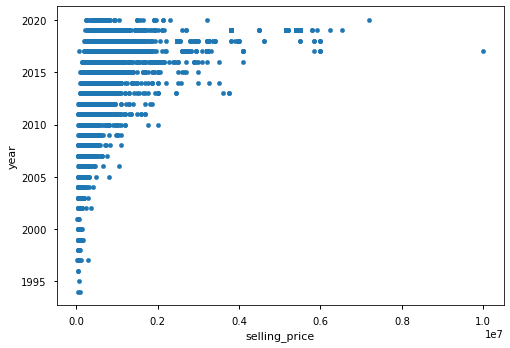

In [9]:
df.plot(y ='year',x='selling_price',kind='scatter')

In [10]:
from mpl_toolkits.mplot3d import Axes3D

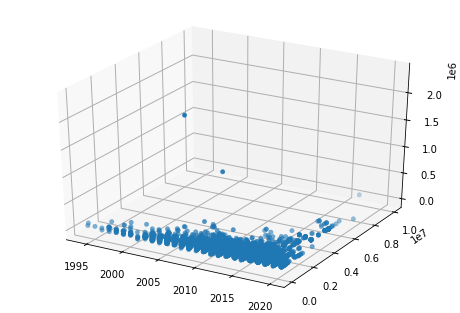

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df['year'],df['selling_price'],df['km_driven'])


In [12]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [13]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [14]:
df['seller_type'].unique()


array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [15]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [16]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [17]:
dm=df

In [18]:
dm['fuel'] = df['fuel'].replace({'Diesel':0, 'Petrol':1, 'LPG':2, 'CNG':3})

In [19]:
import regex as re

In [20]:
dm['mileage'] = dm['mileage'].apply(lambda x: re.split(' ',x)[0])
dm['engine'] = dm['engine'].apply(lambda x: re.split(' ',x)[0])
dm['max_power']= dm['max_power'].apply(lambda x: re.split(' ',x)[0])

In [21]:
dm['transmission'] = dm['transmission'].replace({'Manual':0, 'Automatic':1})

In [22]:
dm['owner'] = dm['owner'].replace({'First Owner':1, 'Second Owner':2, 'Third Owner':3,
       'Fourth & Above Owner':4, 'Test Drive Car':0})

In [23]:
dm['age'] = dm['year'].apply(lambda x: 2021 - x)

In [24]:
dm.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,Maruti Swift Dzire VDI,2014,450000,145500,0,Individual,0,1,23.4,1248,74,190Nm@ 2000rpm,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,Individual,0,2,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,7
2,Honda City 2017-2020 EXi,2006,158000,140000,1,Individual,0,3,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0,15
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,Individual,0,1,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0,11
4,Maruti Swift VXI BSIII,2007,130000,120000,1,Individual,0,1,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0,14


In [25]:
dm.drop({'year','torque'},axis=1,inplace=True)

In [26]:
dm['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [27]:
dm['seller_type']= dm['seller_type'].replace({'Individual':1, 'Dealer':0, 'Trustmark Dealer':2})

In [28]:
len(dm['name'].unique())

1982

In [29]:
types = {'mileage': float , 'max_power':float, 'engine':float}
dm = dm.astype(types)

In [30]:
dm = dm.set_index('selling_price')

In [31]:
dm.reset_index(inplace=True)

In [32]:
dm.head()

,selling_price,name,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,450000,Maruti Swift Dzire VDI,145500,0,1,0,1,23.40,1248.0,74.00,5.0,7
1,370000,Skoda Rapid 1.5 TDI Ambition,120000,0,1,0,2,21.14,1498.0,103.52,5.0,7
2,158000,Honda City 2017-2020 EXi,140000,1,1,0,3,17.70,1497.0,78.00,5.0,15
3,225000,Hyundai i20 Sportz Diesel,127000,0,1,0,1,23.00,1396.0,90.00,5.0,11
4,130000,Maruti Swift VXI BSIII,120000,1,1,0,1,16.10,1298.0,88.20,5.0,14


In [33]:
#dm['name'].value_counts()
dp = dm
dp['brand'] = dm['name'].apply(lambda x: re.split(' ',x)[0])
dp = dm.groupby(['brand']).mean()

In [34]:
dp.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
brand,,,,,,,,,,,
Ambassador,1.240000e+05,82500.000000,0.000000,1.000000,0.000000,2.250000,12.975000,1868.500000,47.875000,5.000000,18.500000
Ashok,3.000000e+05,200000.000000,0.000000,1.000000,0.000000,2.000000,20.070000,1461.000000,75.000000,8.000000,8.000000
Audi,2.612200e+06,53896.550000,0.125000,0.450000,1.000000,1.225000,15.774500,2171.100000,191.045250,5.300000,5.775000
BMW,4.153814e+06,29960.466102,0.025424,0.211864,1.000000,1.169492,17.426441,2109.406780,195.839492,4.940678,4.220339
Chevrolet,2.738675e+05,79785.373913,0.447826,0.956522,0.034783,1.713043,18.437174,1389.708696,82.129174,5.765217,8.847826


In [35]:
dm.drop(columns={'name','brand'},inplace=True)

In [36]:
y = dm['selling_price']
x = dm.loc[:,list(dm.columns)[1:]]

In [37]:
from sklearn.preprocessing import StandardScaler as ss 
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression as lr 
from sklearn.neighbors import KNeighborsTransformer
from sklearn.ensemble import RandomForestRegressor as rr 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score


In [38]:
scaller = ss()
scaller.fit(x)
x = scaller.fit_transform(x)

In [39]:
x_tr , x_test , y_tr , y_test = tts(x,y,test_size = 0.2)

## model training

### linear regression

In [40]:
lire = lr().fit(x_tr , y_tr)

In [41]:
print(lire.score(x_tr,y_tr),lire.score(x_test,y_test))

0.6831187292507465 0.654436139332701


### lasso regression

In [42]:
lasso_re = Lasso().fit(x_tr , y_tr)

In [43]:
lasso_re.score(x_tr , y_tr), lasso_re.score(x_test,y_test)

(0.6831187292361456, 0.6544366097044755)

### knn regression

In [44]:
from sklearn.neighbors import KNeighborsRegressor as knn

In [45]:
for n in range(1,10,1):
    knn_re = knn(n_neighbors=n)
    knn_re.fit(x_tr,y_tr)
    print(knn_re.score(x_tr , y_tr),knn_re.score(x_test,y_test))

0.9993873786114614 0.9410523379147968
0.9851735983353478 0.9379761159626695
0.9736524578436984 0.9383327637365995
0.968004147428285 0.9392578510659774
0.9629009515869938 0.9378861908305729
0.9576331130402057 0.9367673704227328
0.9525167593327101 0.9350834497301255
0.9477206080322335 0.9333047546792606
0.9446330752783767 0.9313354637462042


In [46]:
knn_re = knn(n_neighbors=5).fit(x_tr,y_tr)

In [47]:
knn_re.score(x_test,y_test)*100

93.78861908305728

### Polynomial regression

In [48]:
from sklearn.preprocessing import PolynomialFeatures as poly 

In [49]:
def pr(x,y):
    x1 = poly(degree=3).fit_transform(x)
    X_train, X_test, y_train, y_test = tts(x1,y,random_state =2)
    linreg = lr().fit(X_train, y_train)
    return linreg.score(X_test,y_test)

In [50]:
pr(x,y)*100

93.25908081555109

### Logistic regression

In [51]:
from sklearn.linear_model import LogisticRegression as log_rig  
logrig = log_rig().fit(x_tr , y_tr)

In [52]:
logrig.score(x_tr , y_tr), logrig.score(x_test,y_test)

(0.13725490196078433, 0.12262958280657396)

#### so basically this is not for regression problem. and other thing is it has lowest accuacy

### Gradient boosting Regression

In [53]:
from sklearn.ensemble import GradientBoostingRegressor as gr 
gre_re = gr().fit(x_tr,y_tr)

In [54]:
gre_re.score(x_tr,y_tr),gre_re.score(x_test,y_test)

(0.9709589105033476, 0.9533505896177534)

#### this is the best regression model with highest accuracy

### cross validation

In [55]:
from sklearn.model_selection import cross_val_score 

In [64]:
clf = knn(n_neighbors= 2)
cv_score = cross_val_score(clf,x,y)

In [65]:
print(cv_score.mean())

0.9401784730650593


this is how we are going to eveluate the model for higher trust factor